<a href="https://colab.research.google.com/github/dinesh-2k3/BharatInternTasks/blob/main/market_maven_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate Random Data

# Number of rows (transactions)
num_rows = 1000

# Generate dates between 2022-01-01 and 2023-12-31
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_rows)]

# Generate times between 00:00 and 23:59
times = [str(random.randint(0, 23)).zfill(2) + ":" + str(random.randint(0, 59)).zfill(2) for _ in range(num_rows)]

# Random categorical data
product_lines = ['Supermarket', 'Cosmetics', 'Electronics', 'Home and Lifestyle', 'Sports and Travel']
customer_types = ['Member', 'Normal']
genders = ['Male', 'Female']
payments = ['Cash', 'Credit card', 'Ewallet']

# Random numerical data
quantities = np.random.randint(1, 10, size=num_rows)  # Random quantities between 1 and 10
unit_prices = np.random.uniform(5, 500, size=num_rows)  # Random unit price between 5 and 500
ratings = np.random.uniform(1, 5, size=num_rows)  # Random ratings between 1 and 5

# Calculate Total and Gross Income
totals = quantities * unit_prices  # Total sales (Quantity * Unit price)
gross_incomes = totals - (totals * 0.05)  # Assuming 5% gross income (excluding tax)

# Create the DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Time': times,
    'Product line': [random.choice(product_lines) for _ in range(num_rows)],
    'Customer type': [random.choice(customer_types) for _ in range(num_rows)],
    'Gender': [random.choice(genders) for _ in range(num_rows)],
    'Payment': [random.choice(payments) for _ in range(num_rows)],
    'Quantity': quantities,
    'Unit price': unit_prices,
    'Total': totals,
    'gross income': gross_incomes,
    'Rating': ratings
})

# Save to Excel
df.to_excel('supermarket_dataset.xlsx', index=False)

# Print the first few rows to verify the data
print(df.head())

        Date   Time       Product line Customer type  Gender  Payment  \
0 2023-10-17  17:14        Supermarket        Member    Male     Cash   
1 2022-04-25  20:09        Electronics        Normal  Female  Ewallet   
2 2022-01-26  08:52        Electronics        Member    Male  Ewallet   
3 2022-10-09  04:04  Sports and Travel        Normal    Male     Cash   
4 2022-09-08  01:10          Cosmetics        Normal  Female     Cash   

   Quantity  Unit price        Total  gross income    Rating  
0         7  119.382024   835.674170    793.890462  3.755541  
1         4  337.586908  1350.347632   1282.830251  4.493292  
2         8   14.756716   118.053730    112.151043  3.545165  
3         5   56.533748   282.668740    268.535303  4.044486  
4         7  400.958462  2806.709236   2666.373774  1.640287  


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

<ipython-input-5-fd0ffeb566e9>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)


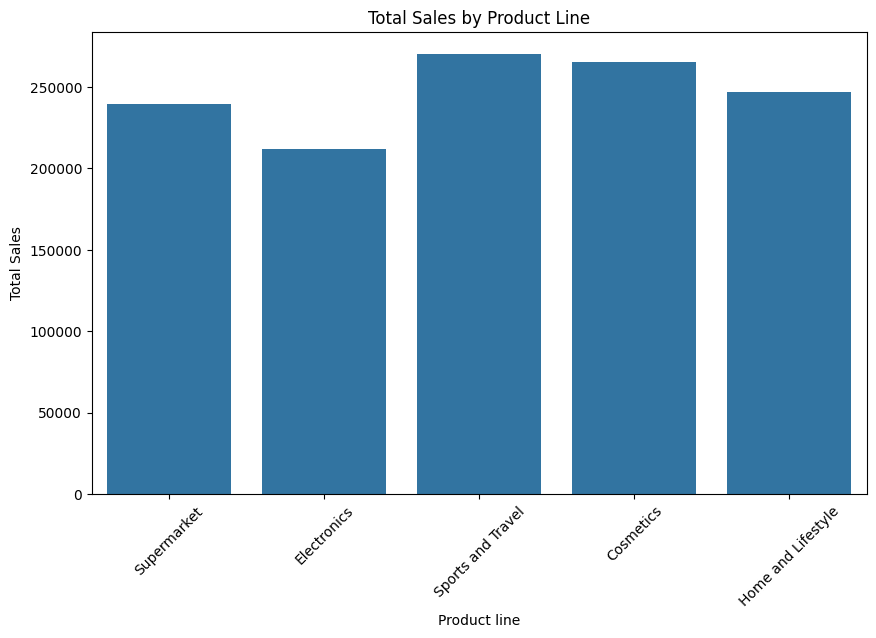

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns # Import the seaborn library

# Sales Distribution by Product Line
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Total Sales')
plt.show()

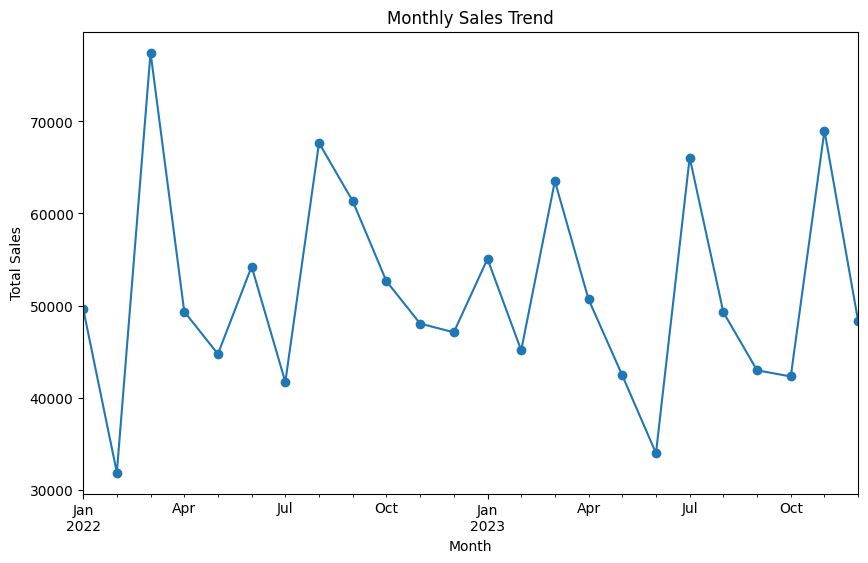

In [ ]:
 # 2. Sales Trends Over Time
sales_trend = df.groupby(df['Date'].dt.to_period('M'))['Total'].sum()
sales_trend.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()



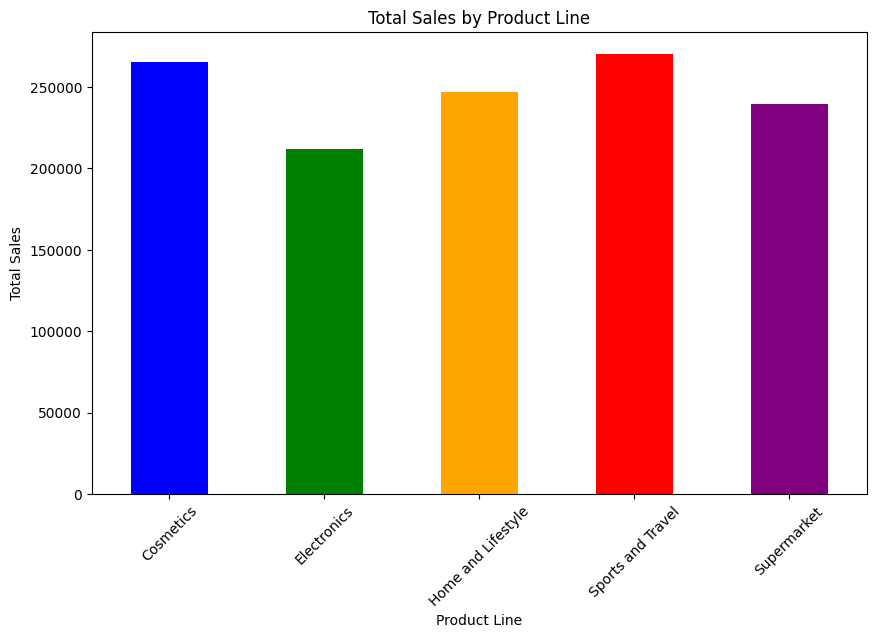

In [ ]:
# 3. Branch/City-Wise Sales
# Since the DataFrame does not have 'Branch' and 'City' columns,
# we need to either add these columns with relevant data
# or group by existing columns.
# For example, if you want to analyze sales by product line:
product_line_sales = df.groupby('Product line')['Total'].sum()

# Then you can plot this data:
plt.figure(figsize=(10, 6))
product_line_sales.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])  # Adjust colors as needed
plt.title('Total Sales by Product Line')
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# If you have Branch and City data in your original dataset, you need to include it
# when you create the DataFrame in the first step.

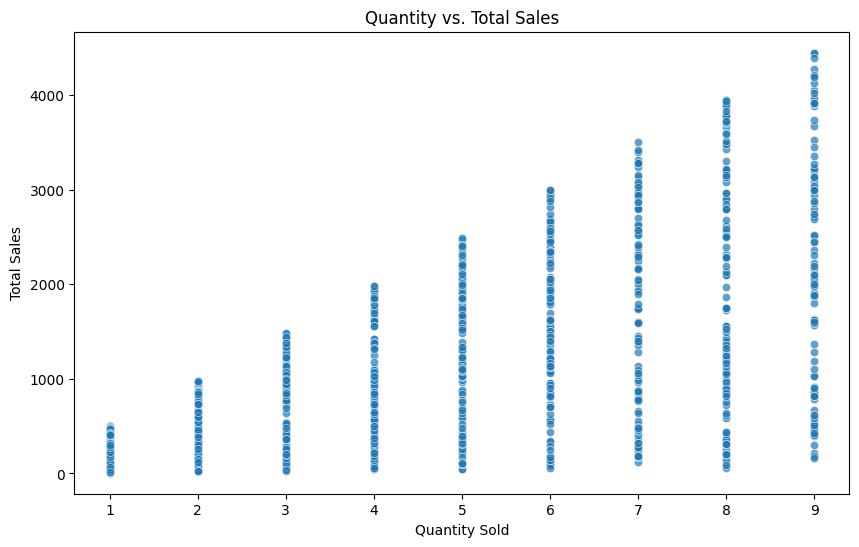

In [ ]:
# 4. Quantity vs. Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total', data=df, alpha=0.7)
plt.title('Quantity vs. Total Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.show()

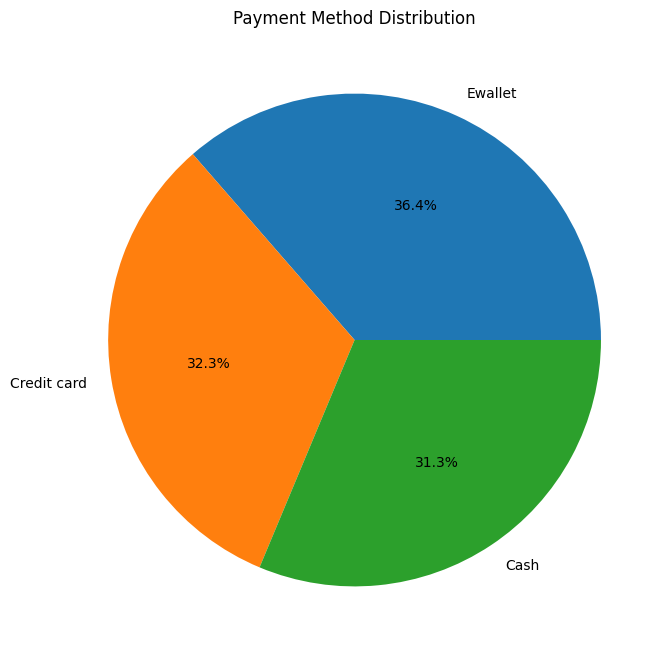

In [ ]:
# 5. Payment Method Distribution
payment_counts = df['Payment'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

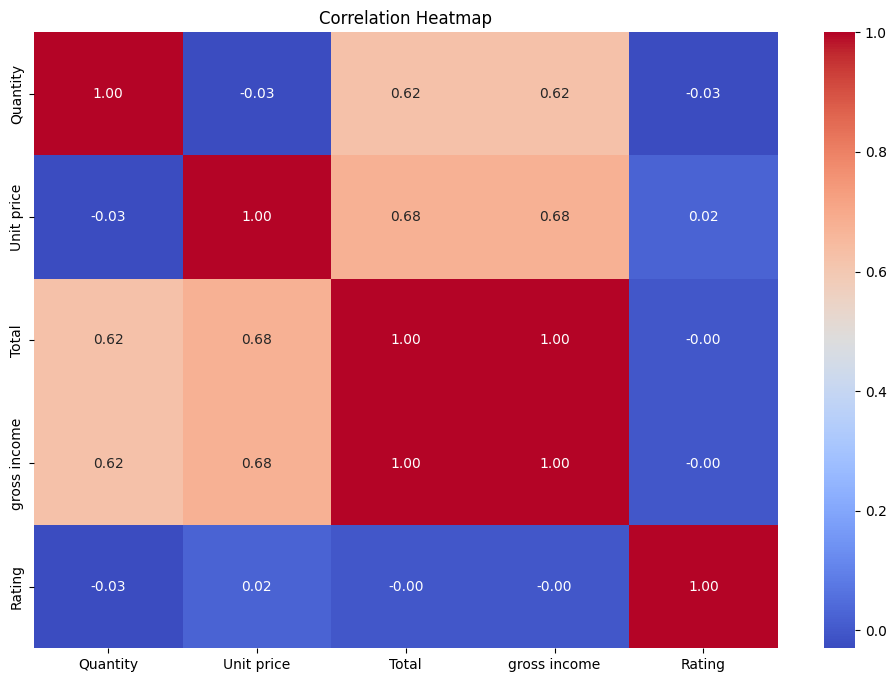

In [ ]:
 # 6. Heatmap of Correlations
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Check column names
print(df.columns)
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

Index(['Date', 'Time', 'Product line', 'Customer type', 'Gender', 'Payment',
       'Quantity', 'Unit price', 'Total', 'gross income', 'Rating'],
      dtype='object')


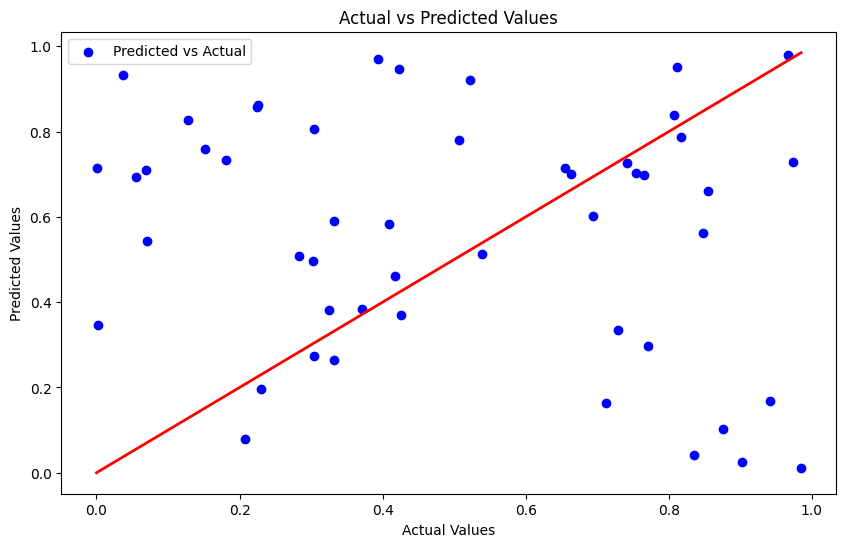

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for generating sample data

# If you don't have y_test and y_pred from a model, create sample data for demonstration:
# Replace this with your actual data if available
y_test = np.random.rand(50)  # Example actual values
y_pred = np.random.rand(50)  # Example predicted values

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

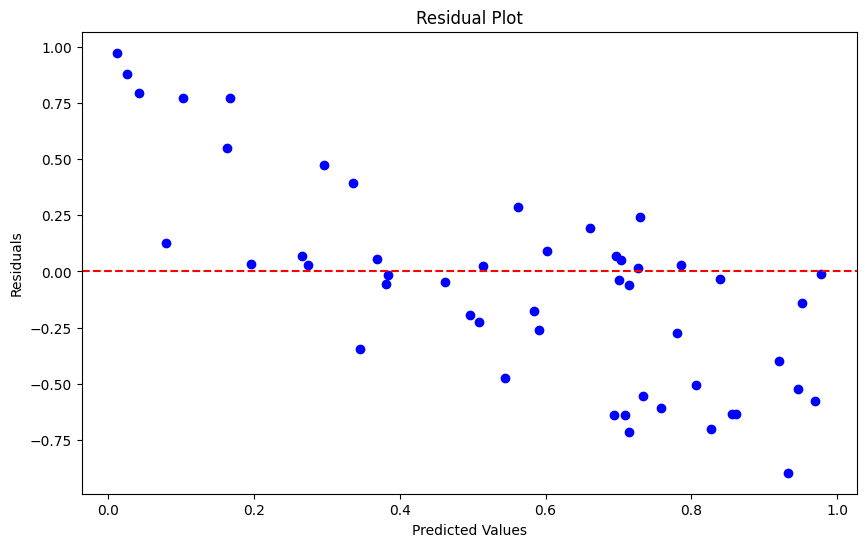

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


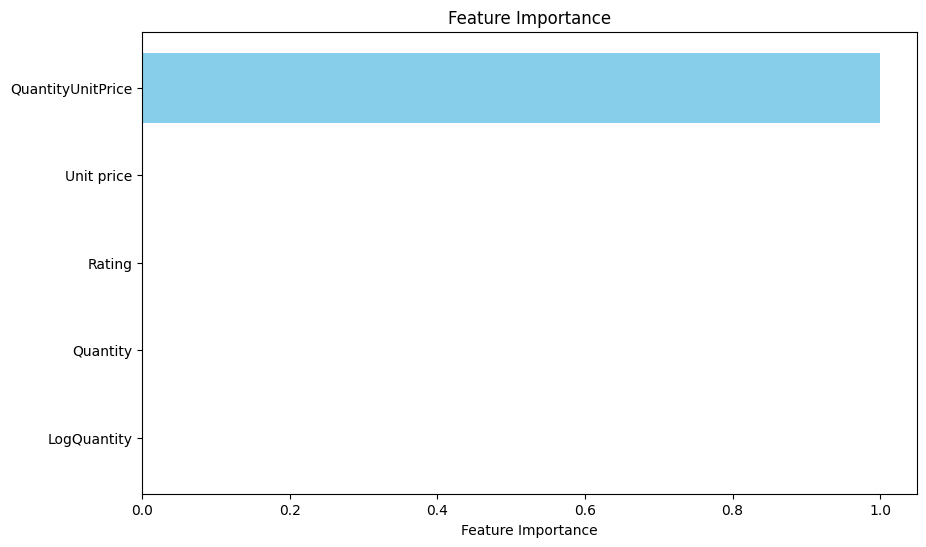

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np


# ... (Your previous code to load and prepare the 'df' DataFrame) ...

# Add the new columns to the DataFrame
df['LogQuantity'] = np.log1p(df['Quantity'])
df['LogTotal'] = np.log1p(df['Total'])
df['LogGrossIncome'] = np.log1p(df['gross income'])
df['QuantityUnitPrice'] = df['Quantity'] * df['Unit price']

# Assuming 'Total' is the target variable and other relevant columns are features
# Select features (X) and target (y)
X = df[['Quantity', 'Unit price', 'Rating', 'LogQuantity', 'QuantityUnitPrice']]  # Select relevant features
y = df['Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)  # Initialize the model
rf_regressor.fit(X_train, y_train)  # Train the model


# Feature importance for Random Forest
importances = rf_regressor.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

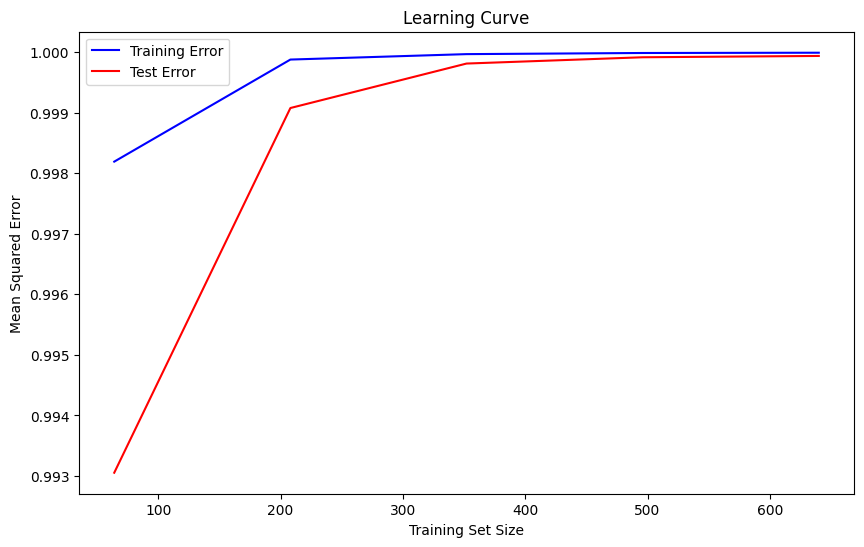

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_regressor, X_train, y_train, cv=5)

# Calculate mean and std deviation for plotting
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Test Error', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


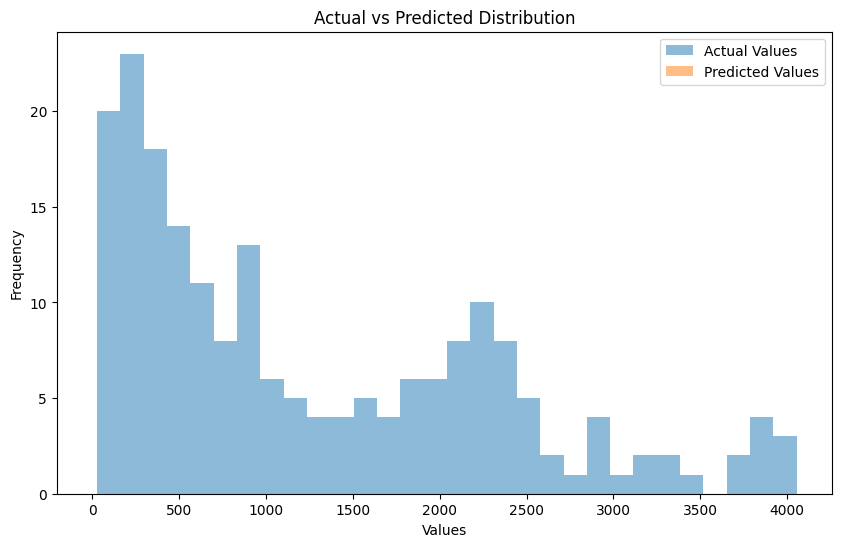

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Values')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.show()


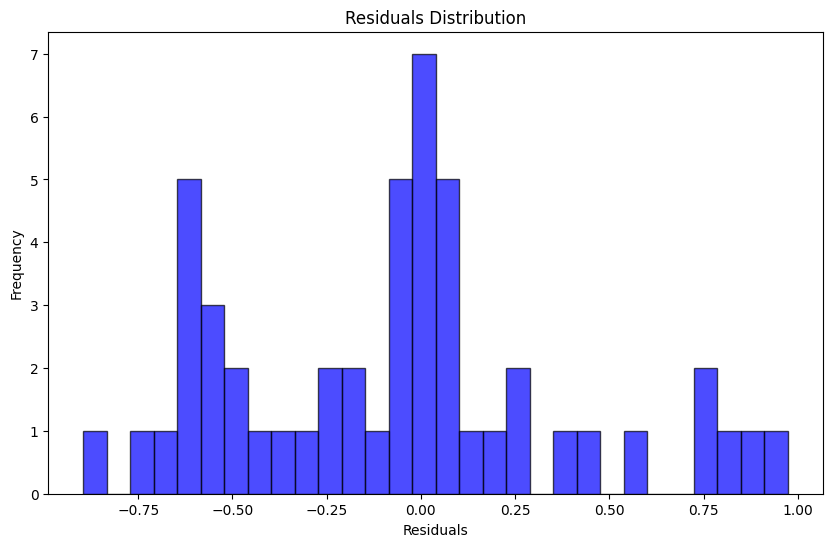

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
